In [ ]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CAX_Train1'

In [ ]:
PH_data_zero = pd.DataFrame()

In [ ]:
files = [f for f in listdir(file_path) if isfile(join(file_path, f))]
for idy, file_iter in enumerate(files):
    print ("File no " + str(idy) + " of "+ str(len(files)))
    data = pd.read_csv('/content/drive/MyDrive/CAX_Train1/'+ file_iter)
    PH_zero = data['PH'] == 0
    PH_data_zero = PH_data_zero.append(data[PH_zero])

File no 0 of 200
File no 1 of 200
File no 2 of 200
File no 3 of 200
File no 4 of 200
File no 5 of 200
File no 6 of 200
File no 7 of 200
File no 8 of 200
File no 9 of 200
File no 10 of 200
File no 11 of 200
File no 12 of 200
File no 13 of 200
File no 14 of 200
File no 15 of 200
File no 16 of 200
File no 17 of 200
File no 18 of 200
File no 19 of 200
File no 20 of 200
File no 21 of 200
File no 22 of 200
File no 23 of 200
File no 24 of 200
File no 25 of 200
File no 26 of 200
File no 27 of 200
File no 28 of 200
File no 29 of 200
File no 30 of 200
File no 31 of 200
File no 32 of 200
File no 33 of 200
File no 34 of 200
File no 35 of 200
File no 36 of 200
File no 37 of 200
File no 38 of 200
File no 39 of 200
File no 40 of 200
File no 41 of 200
File no 42 of 200
File no 43 of 200
File no 44 of 200
File no 45 of 200
File no 46 of 200
File no 47 of 200
File no 48 of 200
File no 49 of 200
File no 50 of 200
File no 51 of 200
File no 52 of 200
File no 53 of 200
File no 54 of 200
File no 55 of 200
Fi

In [ ]:
PH_data_zero.to_pickle('PH_data_zero.df')

In [ ]:

import pandas as pd
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

import pickle
import itertools

In [ ]:
pickle_file = open("PH_data_zero.df", "rb")

In [ ]:
training_data = pd.read_pickle('PH_data_zero.df')

In [ ]:
training_data

,ACID,Flight_instance_ID,Year,Month,Day,Hour,Minute,Second,ABRK,ELEV_1,...,BPGR_2,BPYR_1,BPYR_2,CALT,CASS,CRSS,DFGS,DWPT,EAI,FF
0,676,676200407180535,2004,7,18,5,34,18,60.0,-41.900002,...,0.0,0.0,0.0,0,135.0,102.919189,0,416340,0,0
1,676,676200407180535,2004,7,18,5,34,19,60.0,-41.900002,...,0.0,0.0,0.0,0,135.0,102.919189,0,416340,0,0
2,676,676200407180535,2004,7,18,5,34,20,60.0,-41.900002,...,0.0,0.0,0.0,0,135.0,102.919189,0,416340,0,0
3,676,676200407180535,2004,7,18,5,34,21,60.0,-41.900002,...,0.0,0.0,0.0,0,135.0,102.919189,0,416340,0,0
4,676,676200407180535,2004,7,18,5,34,22,60.0,-41.900002,...,0.0,0.0,0.0,0,135.0,102.919189,0,416340,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,676,676200408241100,2004,8,24,12,13,35,60.0,-41.900002,...,0.0,0.0,0.0,0,119.0,61.962448,0,24,0,0
4440,676,676200408241100,2004,8,24,12,13,36,60.0,-41.900002,...,0.0,0.0,0.0,0,119.0,61.962448,0,24,0,0
4441,676,676200408241100,2004,8,24,12,13,37,60.0,-41.900002,...,0.0,0.0,0.0,0,119.0,61.962448,0,24,0,0
4442,676,676200408241100,2004,8,24,12,13,38,60.0,-41.900002,...,0.0,0.0,0.0,0,119.0,61.962448,0,24,0,0


In [ ]:
feature_columns = [col for col in training_data.columns if not (col=='FF' or col=='Flight_instance_ID' or  col=='ACID')]

y = training_data['FF'].values
X = training_data[feature_columns].values

In [ ]:
X = StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = VarianceThreshold(threshold=0.0).fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# **Random Forest**

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_zero_rf_gen_zero.model", "wb" )) 


In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['HF1' 'LATP' 'ILSF' 'HYDY' 'HYDG' 'Second' 'AOAI_Max' 'HF2' 'ALT_Max'
 'FQTY_2' 'ALTR_Mean' 'BAL1_Mean' 'AOAC_Max' 'CCPC_Mean' 'APUF_Max' 'Year'
 'TAT' 'Month' 'CCPC_Min' 'SPL_2' 'TMODE' 'AOA1_Mean' 'SMOK' 'AOAC_Min'
 'TMAG' 'ALTR_Max' 'ALT_Mean' 'FGC3' 'PS_Max' 'MSQT_1_Min' 'CWPF_Max'
 'FADS' 'SNAP' 'CWPC_Max' 'TAI' 'PI_Mean' 'ALTR_Min' 'PSA_Mean' 'SPLY'
 'PSA_Min' 'BAL1_Max' 'MSQT_1_Mean' 'FIRE_2' 'PS_Min' 'TOCW_Max'
 'APUF_Mean' 'FQTY_1' 'SMKB' 'Minute' 'PI_Max' 'PT_Min' 'SPLG' 'PT_Mean'
 'RUDP_Min' 'ALT_Min' 'PSA_Max' 'CCPF_Max' 'CCPF_Mean' 'RUDP_Mean' 'N1CO'
 'RUDD_Max' 'VHF3' 'SPL_1' 'Day' 'APUF_Min' 'VHF1' 'TCAS' 'CCPC_Max'
 'CCPF_Min' 'CWPC_Mean' 'PS_Mean' 'PI_Min' 'MRK' 'LONP' 'EVNT' 'CWPC_Min'
 'BAL2_Mean' 'MW' 'WAI_2' 'CWPF_Min' 'ELEV_2' 'SHKR_Min' 'MSQT_2_Max'
 'LOC' 'ABRK' 'LMOD' 'Hour' 'HDGS' 'RUDP_Max' 'GLS' 'MNS' 'FIRE_3' 'PACK'
 'CWPF_Mean' 'FQTY_4' 'BAL2_Min' 'ELEV_1' 'OIT_2' 'POVT' 'OIT_1' 'OIPL'
 'FADF' 'FIRE_4' 'FQTY_3' 'FLAP' 'SAT' 'RUDD_Min' 'FIRE_1' 'SHKR_Mean'

In [ ]:
print(np.argsort(rfr.feature_importances_))

[ 25  30  29  28  27   5 130  26 115  19 116 131 127  71  70   0  57   1
  72  55  60 119  50 126  59 118 113  12  94  84  82  11  51  79  56  89
 117  95  53  96 133  83  14  93 112  68  18  49   4  91  99  52  98 105
 114  97  76  74 104  37 103  63  54   2  69  61  58  73  75  77  92  90
  35  33   9  78 134  36  67  81   8 108  88  32   6  31   3  24 106  22
  34  15  43  80  21 135   7  40  45  39  38  10  16  20  17  48 102  13
 107 129  41  23  47  86  62  44  42 121  66 124  85  87 132 111  64  65
 123 110 122  46 120 128 109 125 101 100]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 135.10633668219322


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.9972843928941135


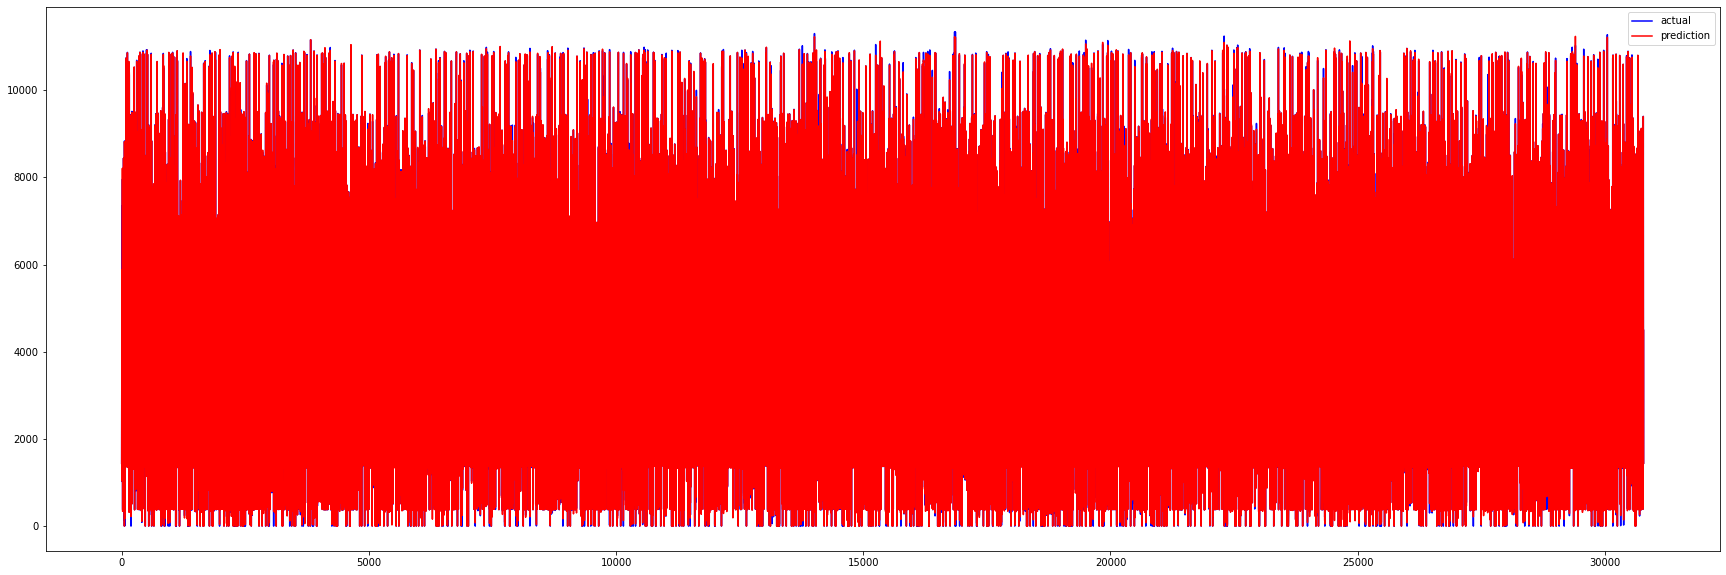

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()


# **GRADIENT BOOSTING REGRESSOR**

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfr = GradientBoostingRegressor(n_estimators=10, random_state= 0 )

In [ ]:
rfr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [ ]:
pickle.dump( rfr, open( "ph_zero_rf_gen_zero.model", "wb" )) 


In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['Year' 'PI_Max' 'PI_Mean' 'MSQT_2_Max' 'MSQT_2_Mean' 'MSQT_1_Min'
 'MSQT_1_Mean' 'CWPF_Max' 'CWPF_Min' 'CWPF_Mean' 'CWPC_Max' 'CWPC_Min'
 'CWPC_Mean' 'CCPF_Max' 'CCPF_Min' 'CCPF_Mean' 'CCPC_Max' 'CCPC_Min'
 'CCPC_Mean' 'APUF_Max' 'APUF_Mean' 'BAL2_Mean' 'VHF3' 'VHF2' 'VHF1'
 'TMODE' 'PS_Mean' 'PS_Min' 'PS_Max' 'PSA_Mean' 'BAL1_Max' 'BAL1_Min'
 'BAL1_Mean' 'AOAI_Max' 'AOAI_Min' 'AOAC_Max' 'AOAC_Min' 'AOA1_Max'
 'AOA1_Mean' 'ALTR_Max' 'ALTR_Min' 'ALTR_Mean' 'TMAG' 'ALT_Max' 'ALT_Mean'
 'TOCW_Max' 'SHKR_Min' 'SHKR_Mean' 'RUDP_Max' 'RUDP_Min' 'RUDP_Mean'
 'RUDD_Max' 'PT_Min' 'PT_Mean' 'PSA_Max' 'PSA_Min' 'ALT_Min' 'TCAS'
 'BAL2_Min' 'HF1' 'ELEV_1' 'ELEV_2' 'LOC' 'EVNT' 'LATP' 'ILSF' 'HYDY'
 'HYDG' 'HF2' 'TAT' 'MNS' 'HDGS' 'FADF' 'FADS' 'GLS' 'FQTY_4' 'FQTY_3'
 'FQTY_2' 'FQTY_1' 'FGC3' 'FIRE_1' 'FIRE_2' 'GPWS' 'FIRE_3' 'ABRK' 'MW'
 'SPL_2' 'SPL_1' 'SPLY' 'SPLG' 'Month' 'Day' 'Hour' 'SNAP' 'SMOK' 'SMKB'
 'MRK' 'SAT' 'PTRM' 'Second' 'PACK' 'OIT_3' 'OIT_2' 'OIT_1' 'OIPL' 'N1CO'
 'Minute' 'FIR

In [ ]:
print(np.argsort(rfr.feature_importances_))

[  0  91  89  88  86  84  83  82  81  80  79  78  77  76  75  74  73  72
  71  70  68 134  63  62  61  60  92  93  94  95 133 132 131 130 129 127
 126 121 119 118 117 116  59 115 113 112 108 107 106 105 104 103  99  98
  97  96 114  58 135  25   7   8  32   9  30  29  28  27  26  57  34  24
  10  11  22  21  20  19  18  12  13  14  23  15   6  36  55  54  53  52
   1   2   3  51  50  49  35  48  46   5  43  41  40  39  38  37   4  16
  90  42 102  69  45  67  64  85  17  66  44  31  33  56  65 124 120 110
 123 128 109  47  87 122 111 125 101 100]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 1111.4678563250338


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.816215316740341


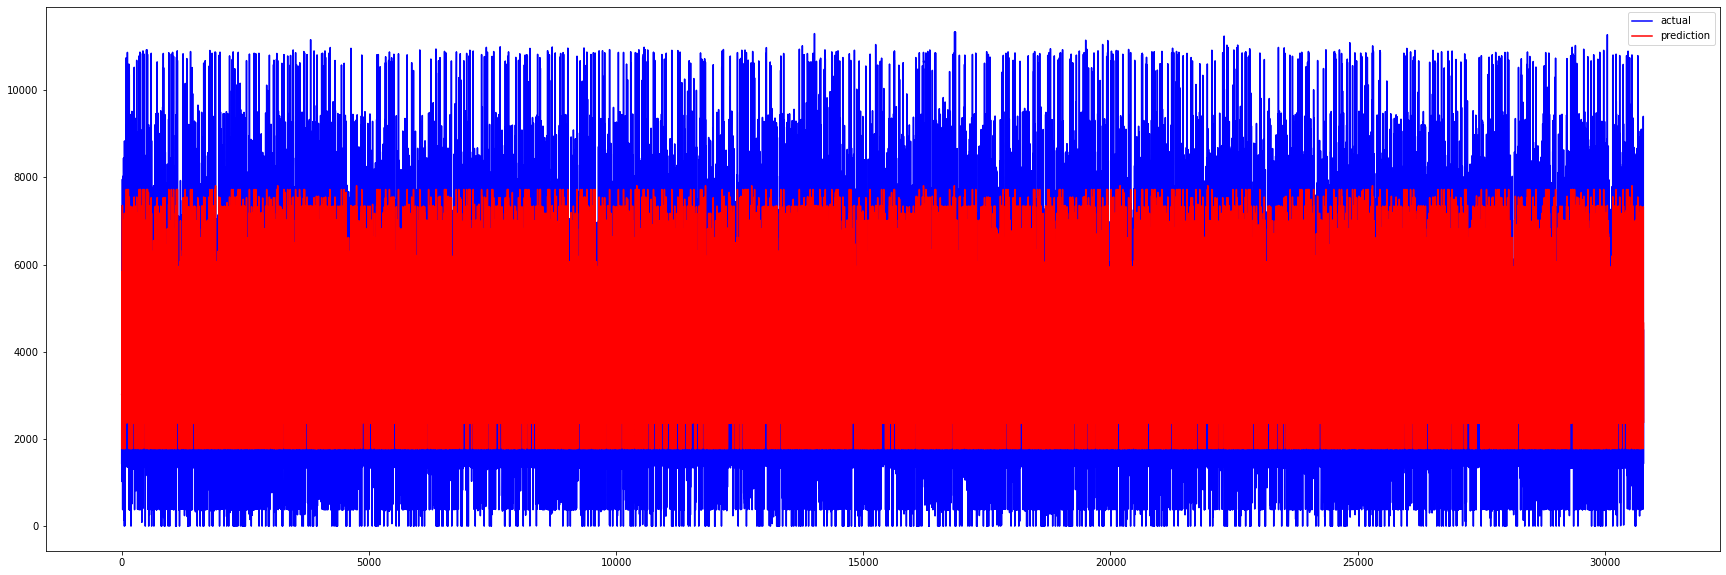

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **K NEAREST NEIGHBOURS**

In [ ]:
from sklearn import neighbors

In [ ]:
rfr = neighbors.KNeighborsRegressor(n_neighbors =20 )

In [ ]:
rfr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:

y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_zero_rf_gen_zero.model", "wb" )) 

In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 237.0013928375509


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.991643637027873


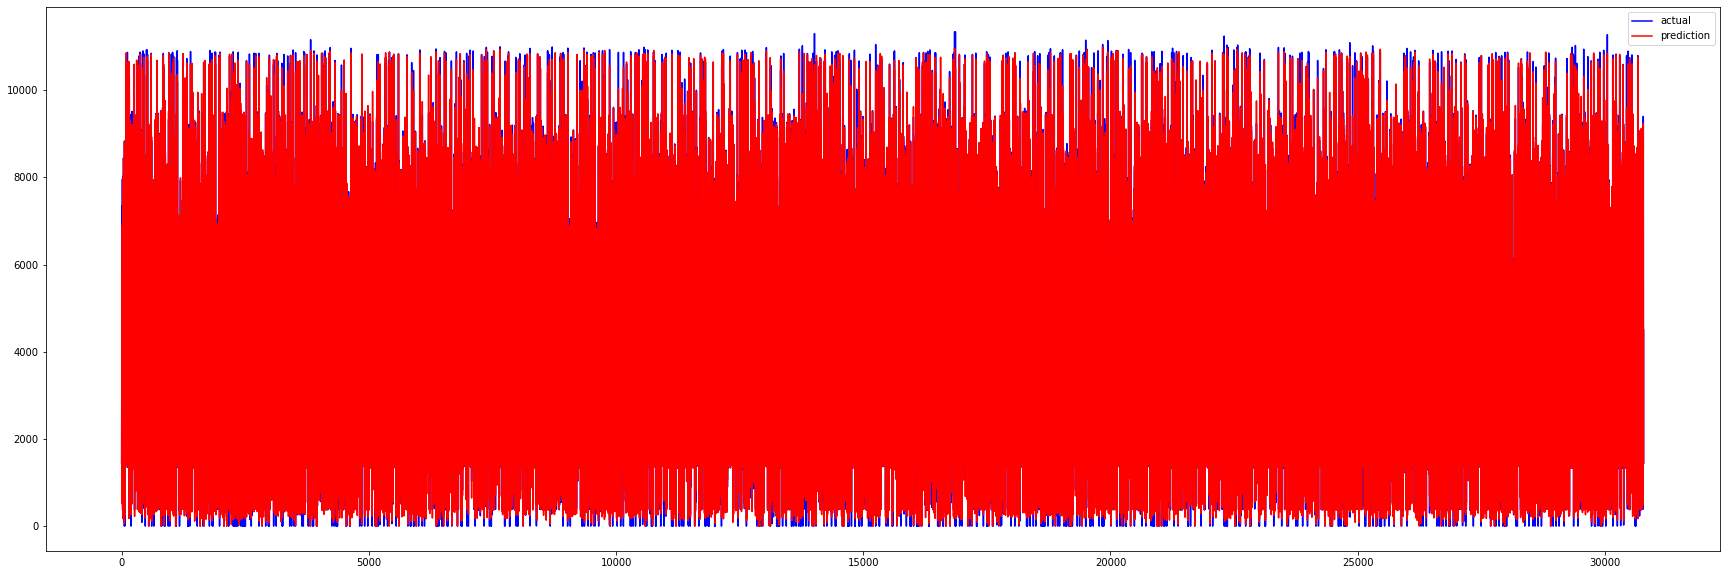

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu',input_shape=(136,)))
                                                                                         
                                                                                         
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
regressor.add(Dense( 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = RMSprop(0.001), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


In [ ]:
regressor.fit(X_train,y_train,epochs=25)

Epoch 1/25
2245/2245 [==============================] - 9s 4ms/step - loss: 410.3188 - mean_absolute_error: 410.3188
Epoch 2/25
2245/2245 [==============================] - 7s 3ms/step - loss: 203.2718 - mean_absolute_error: 203.2718
Epoch 3/25
2245/2245 [==============================] - 4s 2ms/step - loss: 183.5732 - mean_absolute_error: 183.5732
Epoch 4/25
2245/2245 [==============================] - 4s 2ms/step - loss: 172.4231 - mean_absolute_error: 172.4231
Epoch 5/25
2245/2245 [==============================] - 4s 2ms/step - loss: 165.1620 - mean_absolute_error: 165.1620
Epoch 6/25
2245/2245 [==============================] - 4s 2ms/step - loss: 159.5273 - mean_absolute_error: 159.5273
Epoch 7/25
2245/2245 [==============================] - 4s 2ms/step - loss: 154.4200 - mean_absolute_error: 154.4200
Epoch 8/25
2245/2245 [==============================] - 4s 2ms/step - loss: 150.5143 - mean_absolute_error: 150.5143
Epoch 9/25
2245/2245 [==============================] - 5s 2ms/s

In [ ]:
y_pred= regressor.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9912966418684585
MSE: 57704.12935668957
RMSE: 240.2168382039227
MAE: 150.030249571035


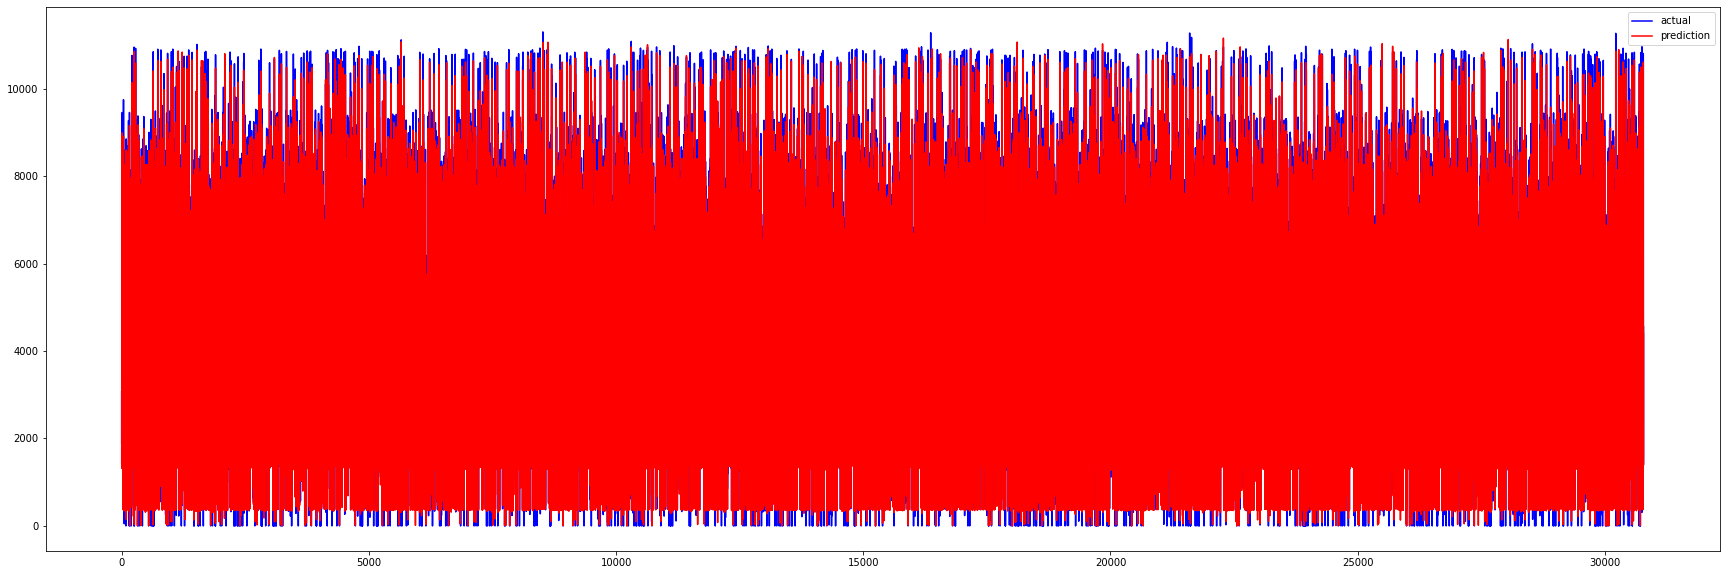

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**CNN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(136,1)))
model.add(Flatten())


In [ ]:
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 135, 32)           96        
                                                                 
 flatten_1 (Flatten)         (None, 4320)              0         
                                                                 
 dense_23 (Dense)            (None, 64)                276544    
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 276,705
Trainable params: 276,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=12,epochs=50, verbose=0)


In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9929468467370048
MSE: 46763.10707995004
RMSE: 216.2477909250174
MAE: 123.32871567009408


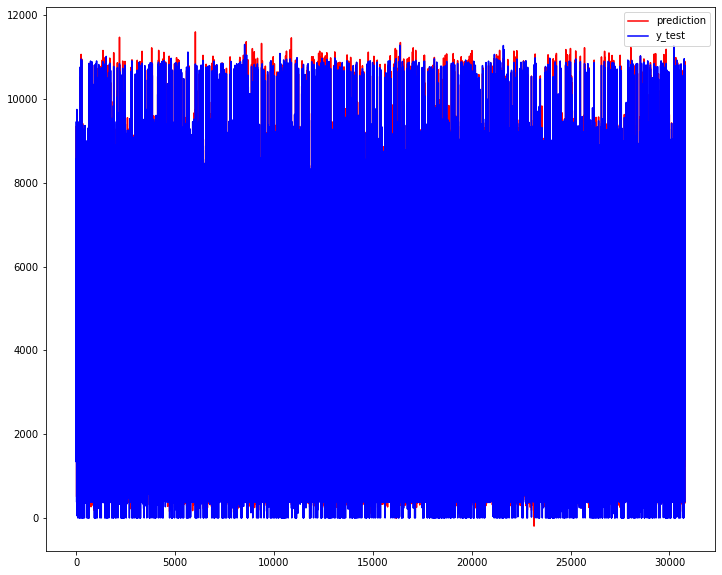

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(y_pred,c='red',label='prediction')
plt.plot(y_val,c='blue',label='y_test')
plt.legend()
plt.show()